In [12]:
from mass import MassModel, MassMetabolite, MassReaction
from mass import MassConfiguration, Simulation
from mass import (
    Simulation, MassSolution, strip_time)
from mass.example_data import create_example_model
from mass.util.matrix import left_nullspace, matrix_rank
from mass.visualization import (
    plot_time_profile, plot_phase_portrait, plot_tiled_phase_portraits)

from os import path
from matplotlib.gridspec import GridSpec

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym
from mass import (
    Simulation, MassSolution, strip_time)
from mass.example_data import create_example_model
from mass.util.matrix import left_nullspace, matrix_rank
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from mass import MassModel, MassMetabolite, MassReaction


In [92]:
df = pd.read_csv("kevolve_data.csv")

In [93]:
df = df.set_index("Unnamed: 0")

In [94]:
df

,Alpha(B.1.1.7),Beta(B.1.351),Delta(B1.617.2),Epsilon(B.1.427),Eta(B.1.525),Gamma(P.1),Iota(B.1.526),Kappa(B.1.617.1),Lambda(C.37),Mu(B.1.621),Omicron(BA.1),Zeta(P.2)
Unnamed: 0,,,,,,,,,,,,
GCCTATA,398,381,373,396,376,399,396,400,395,390,355,400
CTTGCCA,200,200,125,200,199,200,200,100,200,199,199,200
GAAGCTA,299,299,201,200,299,299,300,200,300,200,200,200
TAAAGAT,1099,1105,1105,1200,1096,1100,1100,1100,1191,1099,1001,1099
ACTTATG,1200,1199,1101,1101,1100,1201,1099,1001,1102,1196,1187,1101
CCACTGA,200,200,140,198,196,200,100,142,197,102,103,200
TAAAGGT,402,500,402,400,517,500,468,404,420,531,404,501
CTTACTG,500,492,499,500,500,501,500,500,399,499,500,499
ATGTCTG,302,500,497,500,400,501,399,495,500,500,500,402


In [95]:
np.size(df)

360

In [84]:
df_2 = df.to_numpy()

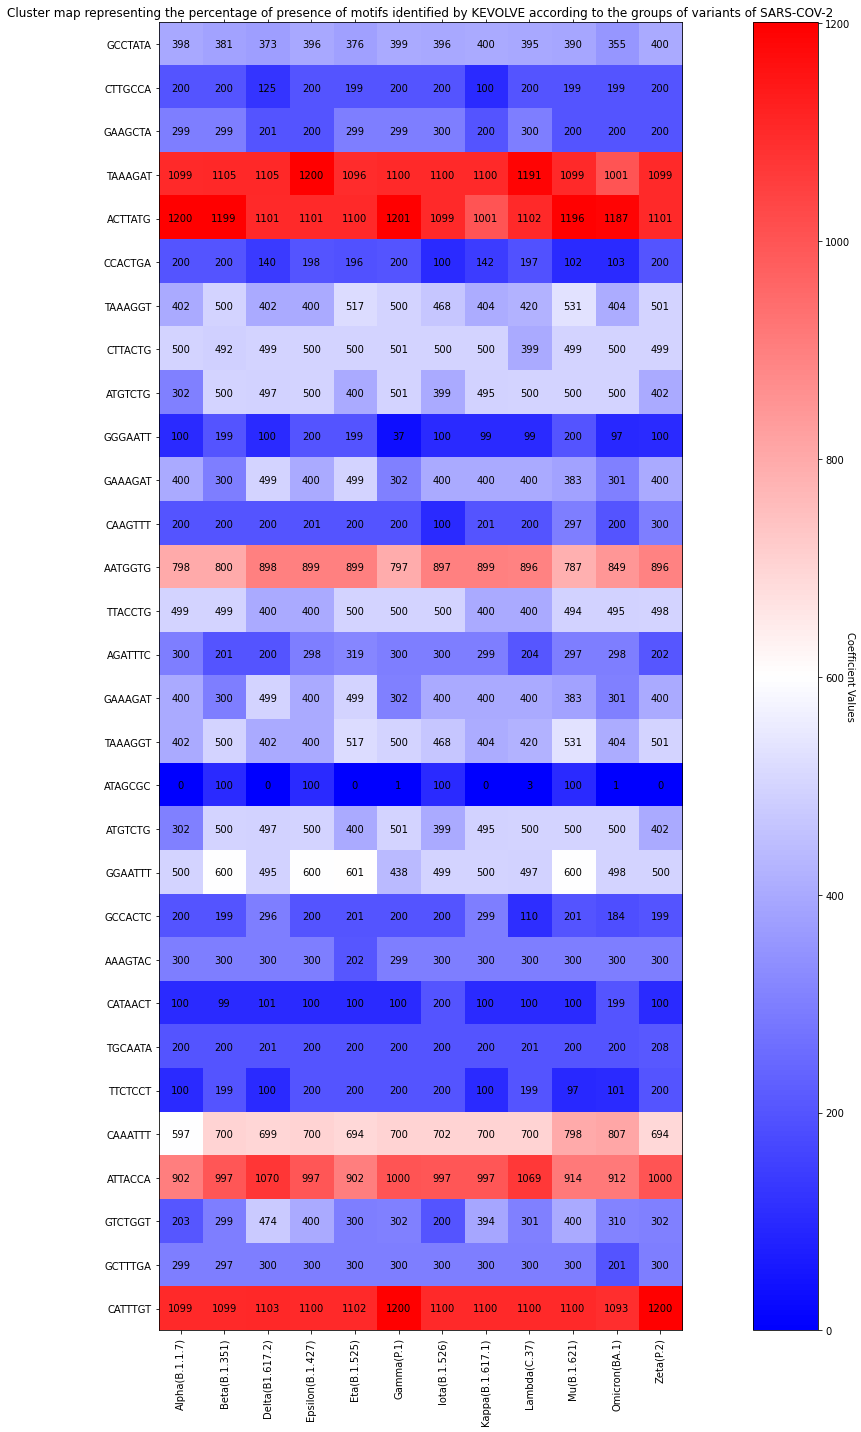

In [96]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
ax.matshow(df, cmap = 'bwr')
im = ax.imshow(df, 'bwr')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Coefficient Values", rotation=-90)
val=max(abs(df).max())
im.set_clim(0,val)
y_label = df.index.to_list()
x_label = df.columns.to_list()
ax.set_xticks(np.arange(len(x_label)),labels = x_label)
ax.set_yticks(np.arange(len(y_label)),labels = y_label)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(labelbottom=True,labeltop=False)
for i in range(len(y_label)):
    for j in range(len(x_label)):
        text=ax.text(j,i,df_2[i,j],ha="center",va="center")
ax.set_title("Cluster map representing the percentage of presence of motifs identified by KEVOLVE according to the groups of variants of SARS-COV-2")
fig.tight_layout()